In [22]:
# haarcascade face detection

In [23]:
# haarcascade xml 다운로드 URL : https://github.com/opencv/opencv  data 디렉토리에서 필요한 xml 파일 다운로드

In [24]:
import cv2
import numpy as np

In [25]:
def detectAndDisplay(frame):

    # frame_width 에 맞추어 image resize

    (height, width) = frame.shape[:2]

    ratio = frame_width / width

    dimension = (frame_width, int(height * ratio))

    frame = cv2.resize(frame, dimension, interpolation = cv2.INTER_AREA)

    # 채널이 많으면 인식율이 떨어지므로 하나의 채널로 변환

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  

    frame_gray = cv2.equalizeHist(frame_gray)            

    # faces detection

    faces = face_cascade.detectMultiScale(frame_gray)

    for (x,y,w,h) in faces:

        center = (x + w//2, y + h//2)

        # detection 된 얼굴에 박스 처리

        frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 4)  

        # frame_gray에서 방금 그린 얼굴 사각형 영역만 가져온다.(faceROI)

        faceROI = frame_gray[y:y+h,x:x+w]  

        # faceROI 에서 eyes detection

        eyes = eyes_cascade.detectMultiScale(faceROI)

        for (x2,y2,w2,h2) in eyes:

            eye_center = (x + x2 + w2//2, y + y2 + h2//2)

            radius = int(round((w2 + h2)*0.25))  # 반지름 계산

            # detection 된 눈에 원을 그린다

            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 4)  

              

    plt.imshow(frame)

(354, 536, 3)


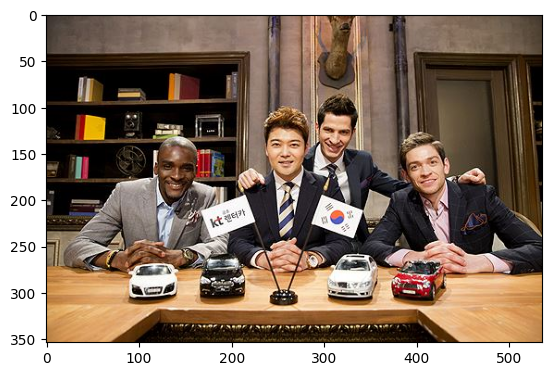

In [26]:
import matplotlib.pyplot as plt

#img = cv2.imread("c:/data/images/meeting1.jpg")
img = cv2.imread("c:/data/images/meeting2.jpg")

print(img.shape)

(height, width) = img.shape[:2]

img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [27]:
# 특성값이 미리 정의되어 있는 haarcascade xml

# 얼굴을 인식하는 feature 파일

face_cascade_name = 'c:/data/haarcascades/haarcascade_frontalface_alt.xml'    

# 눈을 인식하는 feature 파일

eyes_cascade_name = 'c:/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml'

face_cascade = cv2.CascadeClassifier()

eyes_cascade = cv2.CascadeClassifier()

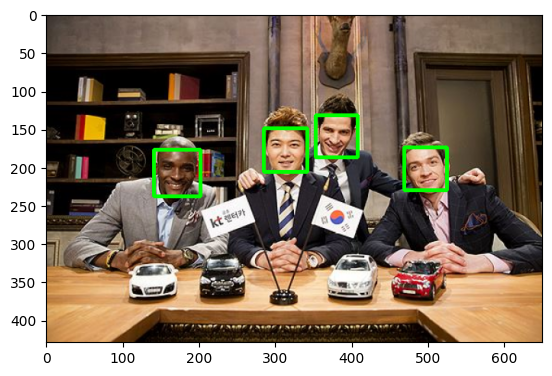

In [28]:
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):

    print('--(!)Error loading face cascade')

    exit(0)

if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):

    print('--(!)Error loading eyes cascade')

    exit(0)

frame_width = 650

detectAndDisplay(img)